In [1]:
#Reading the sequence from Sars_Cov_2 obtained from https://www.ncbi.nlm.nih.gov/nuccore/NC_045512
Sars = ""
with open ('Sars_Cov_2') as f:
    #next ignores the header which is a string
    next(f)
    for line in f:
        #The .strip() function removes '\n' at the end of the lines
        line=line.strip()
        
        #Splitting using '\t' as the delimeter and appending to a list
        Sars += line
        

In [2]:
#Reading the sequence from Influenza.fna obtained from https://www.ncbi.nlm.nih.gov/genome/?term=H1N1
Influenza= ""
with open ('Influenza.fna') as f:
    for line in f:
        #If the line begins with a ">" then we want to ignore that line
        if line[0] == ">":
            line=line.strip()
        else:
            line=line.strip()
            #Splitting using '\t' as the delimeter and appending to a list
            Influenza += line

In [3]:
#Since viral genomes have RNA, convert the thymine (T) residues to uracil (U) residues for analysis
Influenza = Influenza.replace("T","U")
Sars = Sars.replace ("T","U")

In [4]:
#1
#Calculate the A, U, C, and G content in the sequence
#Using the .count() and len functions 
def AUGC_Percentage(sequence):
    sequence.upper()
    A_count = sequence.count('A')
    U_count = sequence.count('U')
    G_count = sequence.count('G')
    C_count = sequence.count('C')
    seq_length = len(sequence)
    print("The Percentage of adenine (A) is",(A_count/seq_length)*100)
    print("The Percentage of uracil (U) is",(U_count/seq_length)*100)
    print("The Percentage of guanine (G) is",(G_count/seq_length)*100)
    print("The Percentage of cytosine (C)is",(C_count/seq_length)*100)
    

In [5]:
AUGC_Percentage(Influenza)

The Percentage of adenine (A) is 33.6170837308285
The Percentage of uracil (U) is 23.45343802744551
The Percentage of guanine (G) is 23.651574080868865
The Percentage of cytosine (C)is 19.27790416085712


In [6]:
AUGC_Percentage(Sars)

The Percentage of adenine (A) is 29.943483931378122
The Percentage of uracil (U) is 32.083737417650404
The Percentage of guanine (G) is 19.60672842189747
The Percentage of cytosine (C)is 18.366050229074006


In [7]:
#2
#Calculate the GC content of the sequence
def GC_Content(sequence):
    sequence.upper()
    G_count = sequence.count('G')
    C_count = sequence.count('C')
    GC_count = G_count + C_count
    seq_length = len(sequence)
    print("The GC content of this sequence is",(GC_count/seq_length)*100)
    

In [8]:
GC_Content(Sars)

The GC content of this sequence is 37.97277865097147


In [9]:
GC_Content(Influenza)

The GC content of this sequence is 42.92947824172599


In [10]:
#Function to calculate the reverse complement of a string
def ReverseComplement(string):
    reverse = list(string[::-1])
    complement = ''
    for i in range(len(reverse)):
        if reverse[i] == "A":
            complement += "U"
        elif reverse[i] == "U":
            complement += "A"
        elif reverse[i] == "C":
            complement +=  "G"
        elif reverse[i] == "G":
            complement += "C"
    return complement
    

In [11]:
#3
#Scan the strand in both forward and reverse directions and look for any potential reading frames
def Open_reading_frames(sequence):
    sequence.upper()
    orf = []
    #AUG represents a start codon
    start = 'AUG'
    #UGA,UAA,UAG represent a stop codon
    stop = ['UGA','UAA','UAG']
    reading_frame = ''
    #Loop through the sequence
    for i in range(0,len(sequence)):
        if sequence[i:i+3] == start:
            #If a start codon is found, start appending the sequence till a stop codon is found.
            while i < len(sequence):
                reading_frame += sequence[i:i+3]
                if sequence[i:i+3] in stop:
                    break
                i += 3
        #If the the length of the reading frame is greater than 150 (50 codons), only then, append to list
        if len(reading_frame)>=150 :
            orf.append(reading_frame)
            reading_frame = ''
    return orf

In [12]:
#Looking for reading frames in the forward direction
Influenza_orf_forward = Open_reading_frames(Influenza)
Sars_orf_forward = Open_reading_frames(Sars)

#Finding the reverse complement of the sequence
Influenza_reverse = ReverseComplement(Influenza)
Sars_reverse = ReverseComplement(Sars)

#Looking for reading frames in the reverse direction
Influenza_orf_reverse = Open_reading_frames(Influenza_reverse)
Sars_orf_reverse = Open_reading_frames(Sars_reverse)

In [13]:
#Import Seq
from Bio.Seq import Seq

In [14]:
#4
#Getting all the proteins using the translate function from the Seq package
Influenza_proteins_forward = []
for i in range(len(Influenza_orf_forward)):
    messenger_rna = Seq(Influenza_orf_forward[i])
    tmp = str(messenger_rna.translate())
    Influenza_proteins_forward.append(tmp)
    
Influenza_proteins_reverse = []
for i in range(len(Influenza_orf_reverse)):
    messenger_rna = Seq(Influenza_orf_reverse[i])
    tmp = str(messenger_rna.translate())
    Influenza_proteins_reverse.append(tmp)
    
Sars_proteins_forward = []
for i in range(len(Sars_orf_forward)):
    messenger_rna = Seq(Sars_orf_forward[i])
    tmp = str(messenger_rna.translate())
    Sars_proteins_forward.append(tmp)
 
Sars_proteins_reverse = []
for i in range(len(Sars_orf_reverse)):
    messenger_rna = Seq(Sars_orf_reverse[i])
    tmp = str(messenger_rna.translate())
    Sars_proteins_reverse.append(tmp)


/home/anil/anaconda3/envs/csb/lib/python3.10/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [15]:
#Import the ProteinAnalysis package 
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [16]:
#5
#Calculate the protein mass of every protein using the Proteinanalysis().molecularweight() function

#MW of proteins translated from open reading frames in the forward strand
Influenza_protein_mass_forward = {}
for i in range(len(Influenza_proteins_forward)):
    #if * is present that means a stop codon was present. Replace that with an empty string.
    seq = Influenza_proteins_forward[i].replace('*','')
    Influenza_protein_mass_forward[seq] = ProteinAnalysis(seq).molecular_weight()

#MW of proteins translated from open reading frames in the reverse strand
Influenza_protein_mass_reverse = {}
for i in range(len(Influenza_proteins_reverse)):
    #if * is present that means a stop codon was present. Replace that with an empty string.
    seq = Influenza_proteins_reverse[i].replace('*','')
    Influenza_protein_mass_reverse[seq] = ProteinAnalysis(seq).molecular_weight()

#MW of proteins translated from open reading frames in the forward strand
Sars_protein_mass_forward = {}
for i in range(len(Sars_proteins_forward)):
    #if * is present that means a stop codon was present. Replace that with an empty string.
    seq = Sars_proteins_forward[i].replace('*','')
    Sars_protein_mass_forward[seq] = ProteinAnalysis(seq).molecular_weight()
    
#MW of proteins translated from open reading frames in the reverse strand    
Sars_protein_mass_reverse = {}
for i in range(len(Sars_protein_mass_reverse)):
    #if * is present that means a stop codon was present. Replace that with an empty string.
    seq = Sars_protein_mass_reverse[i].replace('*','')
    Sars_protein_mass_reverse[seq] = ProteinAnalysis(seq).molecular_weight()

In [17]:
#7
#FrequencyMap
#Input : A sequence 'Text' and an integer K that is the length of the patterns we are looking for.
#Output : It returns a dictionary where the keys are the patterns of length 'k' and the values are number of 
#times it was repeated in the 'Text'
def FrequencyMap(Text, k):
    #Create empty empty dictionary that will contain the patterns
    Map={}
    n = len(Text)
    #Loop through the query sequence
    for i in range(n-k+1):
        #Create a window of length k and obtain all sequences of that length.
        Pattern=Text[i:i+k]
        #Add to dictionary and initialize value.
        Map[Pattern]= Map.get(Pattern,0)+1
    RecurrentPatterns = {}
    for key in Map:
        if Map[key]>1:
            RecurrentPatterns[key] = Map[key]
    return RecurrentPatterns

In [18]:
#Checking Kmers of length 20 in the Influenza genome
K_mers_Influenza = FrequencyMap(Influenza,20)
print(K_mers_Influenza)

{'ACCUUGUUUCUACUAGCAAA': 3, 'CCUUGUUUCUACUAGCAAAA': 7, 'CUUGUUUCUACUAGCAAAAG': 7, 'UUGUUUCUACUAGCAAAAGC': 7, 'UGUUUCUACUAGCAAAAGCA': 7, 'GUUUCUACUAGCAAAAGCAG': 7, 'UUUCUACUAGCAAAAGCAGG': 7, 'UUCUACUAGCAAAAGCAGGU': 2, 'UCUACUAGCAAAAGCAGGUA': 2, 'UACCUUGUUUCUACUAGCAA': 2, 'UUCUACUAGCAAAAGCAGGG': 3, 'AAAAACACCCUUGUUUCUAC': 2, 'AAAACACCCUUGUUUCUACU': 2, 'ACCCUUGUUUCUACUAGCAA': 2, 'CCCUUGUUUCUACUAGCAAA': 2, 'UCUACUAGCAAAAGCAGGGU': 2}


In [19]:
#Checking Kmers of length 20 in the Sars genome
K_mers_Sars = FrequencyMap(Sars,20)
print(K_mers_Sars)

{'AAAAAAAAAAAAAAAAAAAA': 14}


In [20]:
#8
#Are there any matches ?
for key in K_mers_Influenza:
    if key in  K_mers_Sars.keys():
        print('Thats a match!')
        print(key,"was found in the Influenza and Sars COV 2 genome!")
    else:
        print("No matches were found!")
        print(key,"was not found in the Sars COV 2 genome!")
        

No matches were found!
ACCUUGUUUCUACUAGCAAA was not found in the Sars COV 2 genome!
No matches were found!
CCUUGUUUCUACUAGCAAAA was not found in the Sars COV 2 genome!
No matches were found!
CUUGUUUCUACUAGCAAAAG was not found in the Sars COV 2 genome!
No matches were found!
UUGUUUCUACUAGCAAAAGC was not found in the Sars COV 2 genome!
No matches were found!
UGUUUCUACUAGCAAAAGCA was not found in the Sars COV 2 genome!
No matches were found!
GUUUCUACUAGCAAAAGCAG was not found in the Sars COV 2 genome!
No matches were found!
UUUCUACUAGCAAAAGCAGG was not found in the Sars COV 2 genome!
No matches were found!
UUCUACUAGCAAAAGCAGGU was not found in the Sars COV 2 genome!
No matches were found!
UCUACUAGCAAAAGCAGGUA was not found in the Sars COV 2 genome!
No matches were found!
UACCUUGUUUCUACUAGCAA was not found in the Sars COV 2 genome!
No matches were found!
UUCUACUAGCAAAAGCAGGG was not found in the Sars COV 2 genome!
No matches were found!
AAAAACACCCUUGUUUCUAC was not found in the Sars COV 2 

In [21]:
#9
#GCSkewArray
#Input : It takes in the sequence of the genome of an organism
#Output : It returns a list that contains depicts the GC skewness of the genome
def GCSkewArray(Genome):
    Genome = Genome.upper()
    #Declare empty variable
    skew=[0]
    #Range through the genome
    for i in range(len(Genome)):
        #If the nucleotide is a cytosine residue, we subtract one
        if Genome[i]=='C':
            skew.append(skew[i]-1)
        #If the nucleotide is a guanine residue we add one
        elif Genome[i]=='G':
            skew.append(skew[i]+1)
        #If the residue is adenine or thymine, we don't take any action
        else:
            skew.append(skew[i])
    return skew

In [22]:
#ATSkewArray
#Input : It takes in the sequence of the genome of an organism
#Output : It returns a list that contains depicts the AT skewness of the genome
def ATSkewArray(Genome):
    Genome = Genome.upper()
    #Declare empty variable
    skewness=[0]
    #Range through the genome
    for i in range(len(Genome)):
        #We count Us instead of Ts as viruses have uracil instead of thymine.
        #If the nucleotide is a uracil residue, we subtract one
        if Genome[i]== 'U':
            skewness.append(skewness[i]-1)
        #If the nucleotide is an adenine residue we add one
        elif Genome[i]=='A':
            skewness.append(skewness[i]+1)
        #If the residue is cytosine or guanine, we don't take any action
        else:
            skewness.append(skewness[i])
    return skewness

In [23]:
#GC and AT Skew arrays of Influenza
Influenza_GC_Skewness = GCSkewArray(Influenza)
Influenza_AT_Skewness = ATSkewArray(Influenza)

In [24]:
#GC and AT Skew arrays of Sars COV 2
Sars_GC_Skewness = GCSkewArray(Sars)
Sars_AT_Skewness = ATSkewArray(Sars)

In [25]:
#10
#Plotting and Comparing the GC skewness of Influenza and Sars

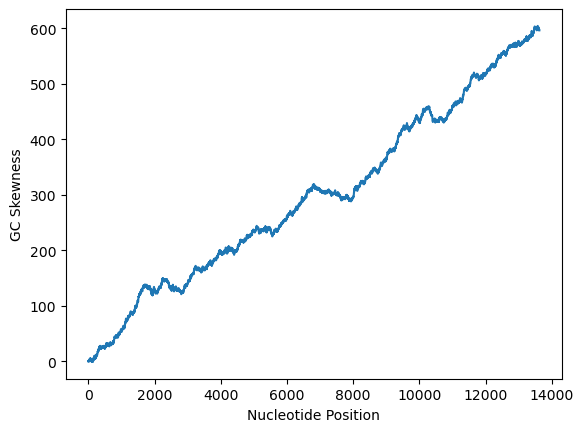

In [26]:
#Using matplotlib to draw the graphs 
from matplotlib import pyplot as plt
#GC skewness of Influenza
#Set labels
plt.xlabel("Nucleotide Position")
plt.ylabel("GC Skewness")
plt.plot(Influenza_GC_Skewness)


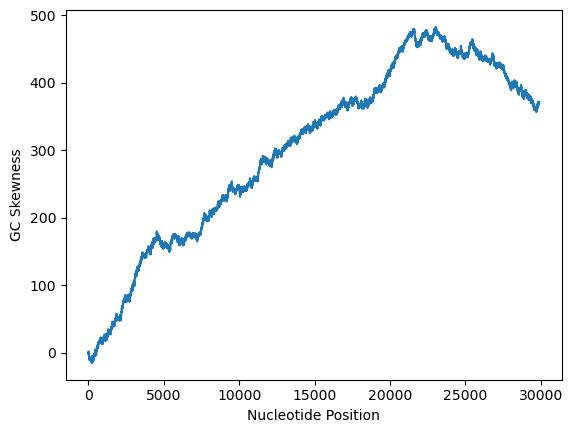

In [27]:
#GC skewness of Sars COV 2
#Set labels
plt.xlabel("Nucleotide Position")
plt.ylabel("GC Skewness")
plt.plot(Sars_GC_Skewness)

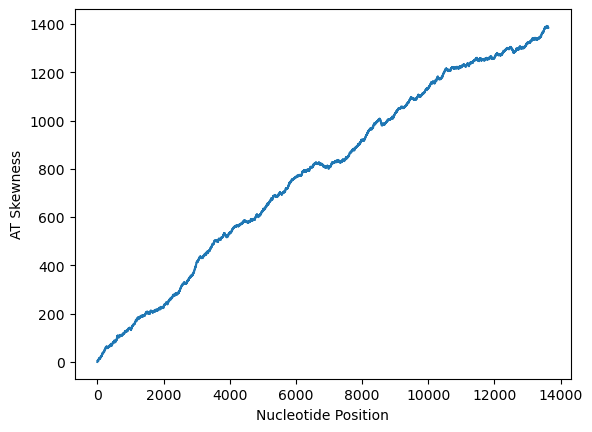

In [28]:
#AT skewness of Influenza
#Set labels
plt.xlabel("Nucleotide Position")
plt.ylabel("AT Skewness")
plt.plot(Influenza_AT_Skewness)

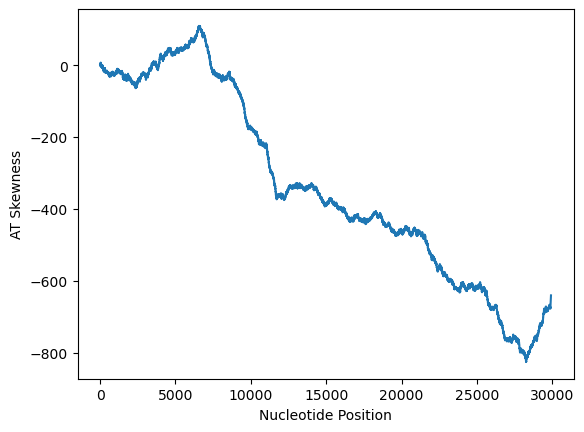

In [29]:
#AT skewness of Sars COV 2
#Set labels
plt.xlabel("Nucleotide Position")
plt.ylabel("AT Skewness")
plt.plot(Sars_AT_Skewness)